In [14]:
#https://quantbrasil.com.br/como-identificar-linhas-de-suporte-e-resistencia-utilizando-python
#https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9

In [1]:
%matplotlib notebook
%matplotlib inline

import trendet
import investpy
import yfinance as yf
import mplfinance as fplt
import mplfinance as mpf

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from datetime import datetime
from subprocess import check_output

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')


from mpl_finance import candlestick_ohlc 
import matplotlib.dates as mpl_dates 
import matplotlib.pyplot as plt

plt.rcParams ['figure.figsize'] = [12, 7] 
plt.rc ('font', size = 14)

C:\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
# Leitura da da base de dados API
df = yf.download("ADA-USD", start="2019-01-01", end="2021-10-1")
df = df.loc['2020-11-01':'2021-12-30',:]
df.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-01,0.093056,0.098487,0.092853,0.098197,0.098197,609565849
2020-11-02,0.098197,0.099935,0.091766,0.092143,0.092143,817756720


In [3]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [4]:
df.head(2)

,Date,Open,High,Low,Close
Date,,,,,
2020-11-01,18567.0,0.093056,0.098487,0.092853,0.098197
2020-11-02,18568.0,0.098197,0.099935,0.091766,0.092143


In [5]:
def isSupport(df, i):
    support = df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] \
        and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support


def isResistance(df, i):
    resistance = df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] \
        and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]

    return resistance

In [6]:
levels = []
for i in range(2, df.shape[0]-2):
    if isSupport(df, i):
        levels.append((i, df['Low'][i]))
    elif isResistance(df, i):
        levels.append((i, df['High'][i]))

In [7]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax, df.values, width=0.6,
                     colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in levels:
        plt.hlines(level[1], xmin=df['Date'][level[0]],
                   xmax=max(df['Date']), colors='blue')
    fig.show()

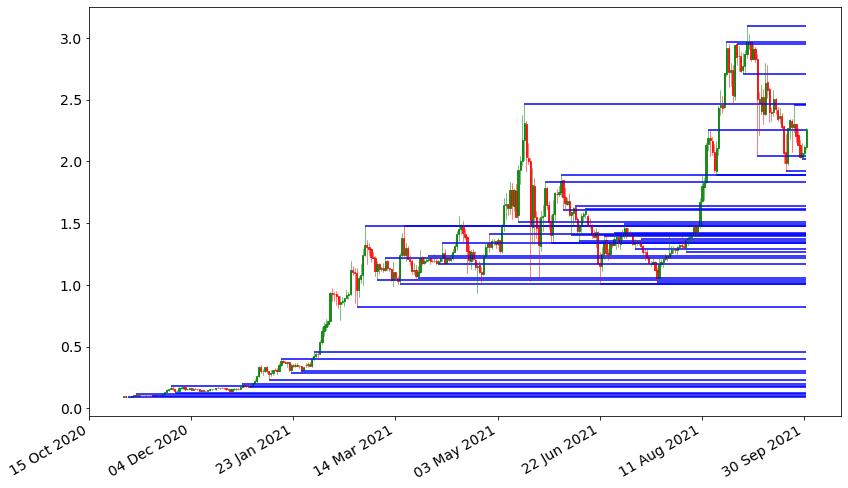

In [8]:
plot_all()

In [9]:
s =  np.mean(df['High'] - df['Low'])

In [10]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [11]:
levels = []
for i in range(2, df.shape[0]-2):
    if isSupport(df, i):
        l = df['Low'][i]

        if isFarFromLevel(l):
            levels.append((i, l))

    elif isResistance(df, i):
        l = df['High'][i]

        if isFarFromLevel(l):
            levels.append((i, l))

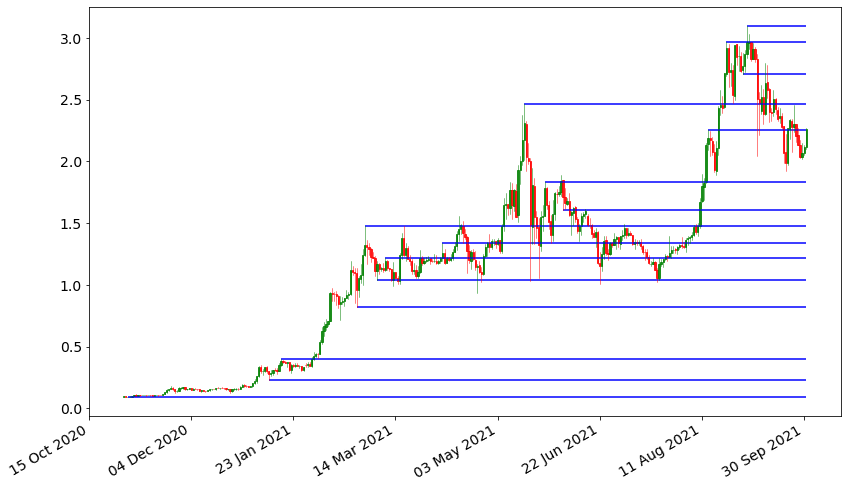

In [12]:
plot_all()